/tmp/ipykernel_1771189/4010295105.py:17: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  old_df = pd.read_csv(old_model_file, sep="\t", compression="gzip", header=None, names=cols)
/tmp/ipykernel_1771189/4010295105.py:18: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(new_model_file, sep="\t", compression="gzip", header=None, names=cols)


Number of m6A positions compared: 5570013
Mean absolute difference: 1.8782588011913104
Pearson correlation: 0.3058036781447971


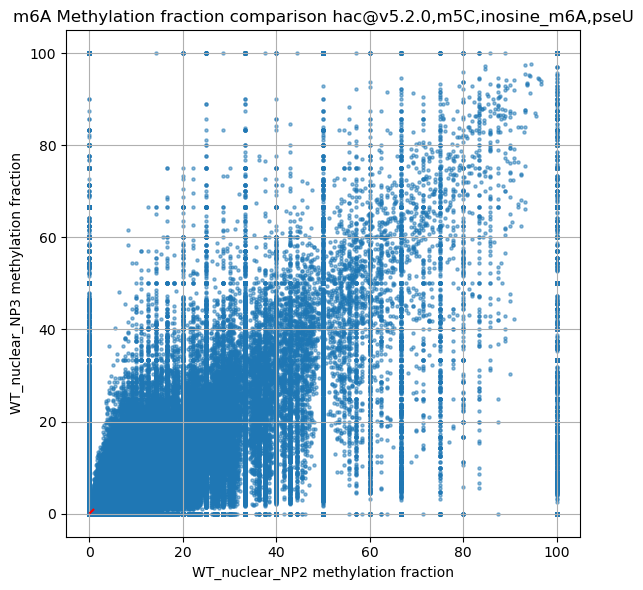

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- INPUT FILES ----
old_model_file = "/data/processing3/erikson_pipegrp/20250811_Hilgers_m6A/25L008163_WT_nuclear_NP2.pileup.bed.gz"
new_model_file = "/data/processing3/erikson_pipegrp/20250811_Hilgers_m6A/25L008164_WT_nuclear_NP3.pileup.bed.gz"

# ---- READ FILES ----
# mpileup.bed has no header; we'll give it generic column names
cols = [
    "chrom", "start", "end", "base_or_code", "score", "strand",
    "thickStart", "thickEnd", "itemRgb", "blockCount",
    "meth_frac", "col12", "col13", "col14", "col15",
    "col16", "col17", "col18"
]

old_df = pd.read_csv(old_model_file, sep="\t", compression="gzip", header=None, names=cols)
new_df = pd.read_csv(new_model_file, sep="\t", compression="gzip", header=None, names=cols)

# ---- FILTER m6A ONLY ----
# 'm' means m6A here
old_df = old_df[old_df["base_or_code"] == "m"]
new_df = new_df[new_df["base_or_code"] == "m"]

# ---- MERGE ----
merged = pd.merge(
    old_df,
    new_df,
    on=["chrom", "start", "end", "strand", "base_or_code"],
    suffixes=("_old", "_new")
)

# ---- DIFFERENCE ----
merged["frac_diff"] = merged["meth_frac_new"] - merged["meth_frac_old"]
merged["abs_diff"] = merged["frac_diff"].abs()

# ---- SUMMARY ----
print("Number of m6A positions 25L008163_WT_nuclear_NP2: ", len(old_df))
print("Number of m6A positions 25L008164_WT_nuclear_NP3: ", len(new_df))
print("Number of m6A positions in old model:", len(old_df))
print("Number of m6A positions compared:", len(merged))
print("Mean absolute difference:", merged["abs_diff"].mean())
print("Pearson correlation:",
      merged[["meth_frac_old", "meth_frac_new"]].corr().iloc[0, 1])

# ---- SAVE LARGE DIFFERENCE POSITIONS ----
threshold = 0.2
large_diff = merged[merged["abs_diff"] >= threshold]
large_diff.to_csv("large_diff_m6A_positions.tsv", sep="\t", index=False)

# ---- PLOT ----
plt.figure(figsize=(6,6))
plt.scatter(merged["meth_frac_old"], merged["meth_frac_new"], s=5, alpha=0.5)
plt.plot([0,1],[0,1], color="red", linestyle="--")
plt.xlabel("WT_nuclear_NP2 methylation fraction")
plt.ylabel("WT_nuclear_NP3 methylation fraction")
plt.title("m6A Methylation fraction comparison hac@v5.2.0,m5C,inosine_m6A,pseU")
plt.grid(True)
plt.tight_layout()
plt.savefig("m6A_methylation_comparison_scatter.png", dpi=300)
plt.show()

/tmp/ipykernel_1771189/94357581.py:17: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  old_df = pd.read_csv(old_model_file, sep="\t", compression="gzip", header=None, names=cols)
/tmp/ipykernel_1771189/94357581.py:18: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(new_model_file, sep="\t", compression="gzip", header=None, names=cols)


Number of m6A positions 25L008167_WT_total_NP9:  8803174
Number of m6A positions 25L008167_WT_total_NP10:  4266769
Mean absolute difference: 2.779985463362139
Pearson correlation: 0.34403738065210643


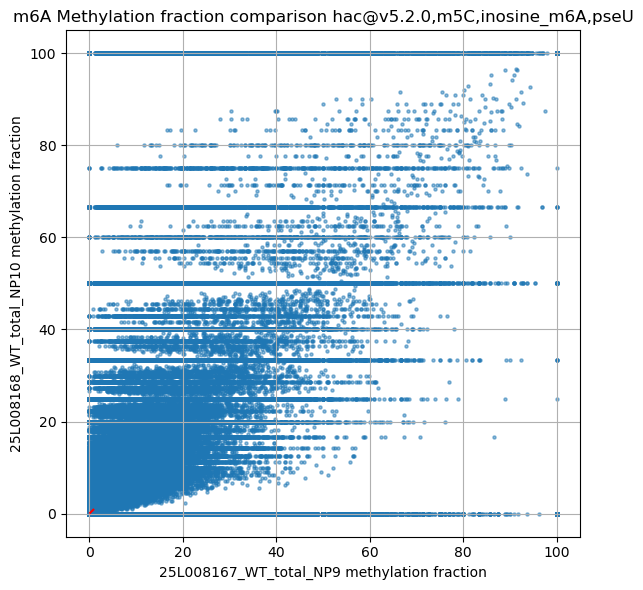

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- INPUT FILES ----
old_model_file = "/data/processing3/erikson_pipegrp/20250811_Hilgers_m6A/25L008167_WT_total_NP9.pileup.bed.gz"
new_model_file = "/data/processing3/erikson_pipegrp/20250811_Hilgers_m6A/25L008168_WT_total_NP10.pileup.bed.gz"

# ---- READ FILES ----
# mpileup.bed has no header; we'll give it generic column names
cols = [
    "chrom", "start", "end", "base_or_code", "score", "strand",
    "thickStart", "thickEnd", "itemRgb", "blockCount",
    "meth_frac", "col12", "col13", "col14", "col15",
    "col16", "col17", "col18"
]

old_df = pd.read_csv(old_model_file, sep="\t", compression="gzip", header=None, names=cols)
new_df = pd.read_csv(new_model_file, sep="\t", compression="gzip", header=None, names=cols)

# ---- FILTER m6A ONLY ----
# 'm' means m6A here
old_df = old_df[old_df["base_or_code"] == "m"]
new_df = new_df[new_df["base_or_code"] == "m"]

# ---- MERGE ----
merged = pd.merge(
    old_df,
    new_df,
    on=["chrom", "start", "end", "strand", "base_or_code"],
    suffixes=("_old", "_new")
)

# ---- DIFFERENCE ----
merged["frac_diff"] = merged["meth_frac_new"] - merged["meth_frac_old"]
merged["abs_diff"] = merged["frac_diff"].abs()

# ---- SUMMARY ----
print("Number of m6A positions 25L008167_WT_total_NP9: ", len(old_df))
print("Number of m6A positions 25L008167_WT_total_NP10: ", len(new_df))
print("Mean absolute difference:", merged["abs_diff"].mean())
print("Pearson correlation:",
      merged[["meth_frac_old", "meth_frac_new"]].corr().iloc[0, 1])

# ---- SAVE LARGE DIFFERENCE POSITIONS ----
threshold = 0.2
large_diff = merged[merged["abs_diff"] >= threshold]
large_diff.to_csv("large_diff_m6A_positions.tsv", sep="\t", index=False)

# ---- PLOT ----
plt.figure(figsize=(6,6))
plt.scatter(merged["meth_frac_old"], merged["meth_frac_new"], s=5, alpha=0.5)
plt.plot([0,1],[0,1], color="red", linestyle="--")
plt.xlabel("25L008167_WT_total_NP9 methylation fraction")
plt.ylabel("25L008168_WT_total_NP10 methylation fraction")
plt.title("m6A Methylation fraction comparison hac@v5.2.0,m5C,inosine_m6A,pseU")
plt.grid(True)
plt.tight_layout()
plt.savefig("m6A_methylation_comparison_scatter.png", dpi=300)
plt.show()